In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Optional: make plots look nicer
sns.set(style="whitegrid")

In [7]:
# Load the Boston Housing dataset (CSV file)
data = pd.read_csv("C:\\Users\\Dell\\Desktop\\Omdena\\ml_assignment\\machine-learning-introduction-bnusuwal\\data\BostonHousing.csv")

# Check the shape of the dataset
print("Dataset Shape:", data.shape)

# Check Columns Names of the dataset
print("Column Names:", data.columns.tolist())




Dataset Shape: (506, 14)
Column Names: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Dell\AppData\Local\Temp\ipykernel_38756\660654640.py:2: SyntaxWarning: invalid escape sequence '\B'
  data = pd.read_csv("C:\\Users\\Dell\\Desktop\\Omdena\\ml_assignment\\machine-learning-introduction-bnusuwal\\data\BostonHousing.csv")


In [9]:
# Preview the first few rows
print(data.head())

# Summary of the dataset
data.info()

# Statistical summary
data.describe()

# Check for missing values
data.isnull().sum()

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [12]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())




Missing values in each column:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Number of duplicate rows: 0


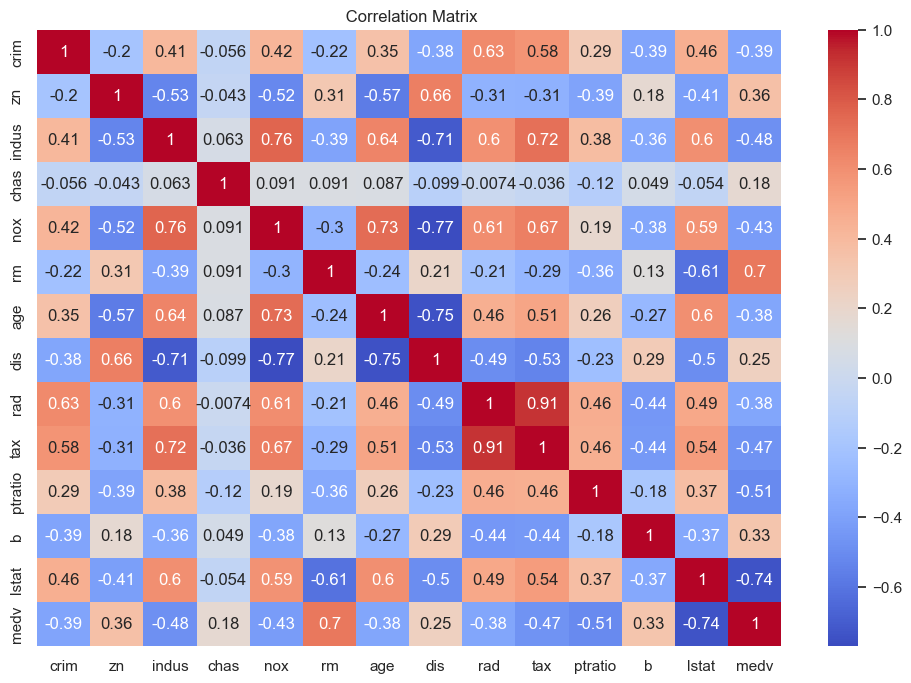

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title(" Correlation Matrix")
plt.show()


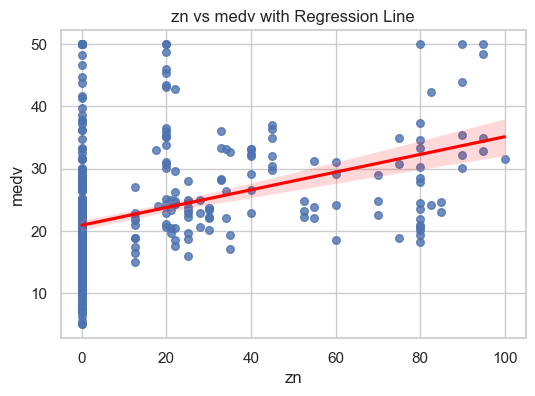

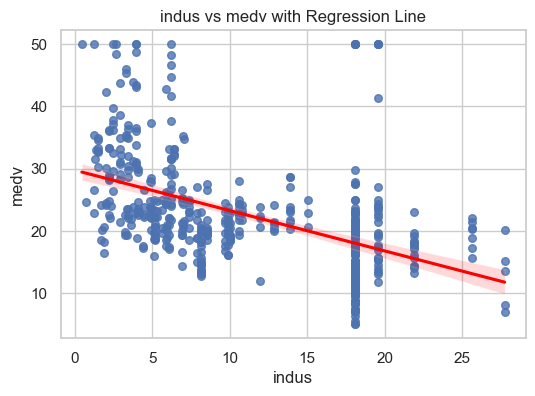

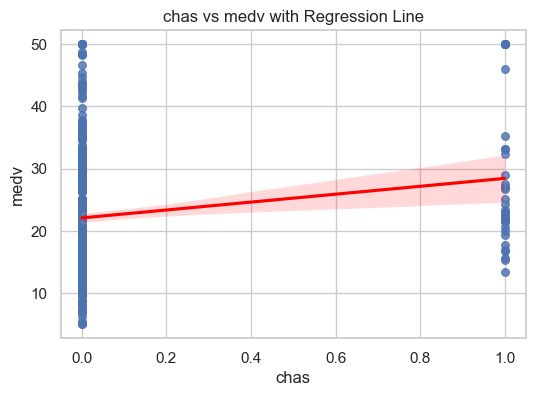

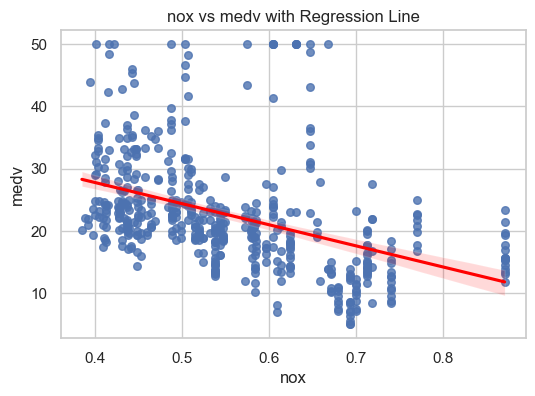

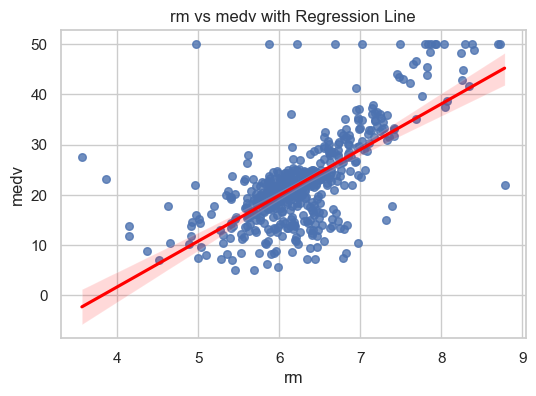

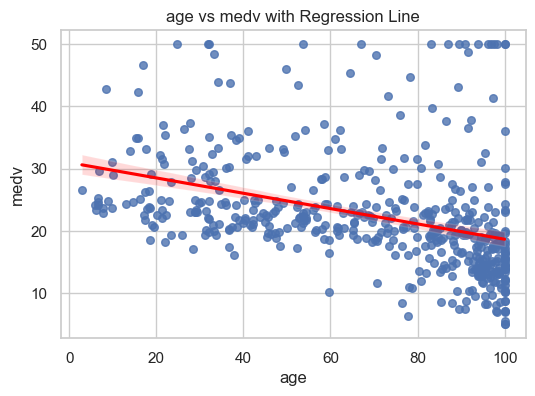

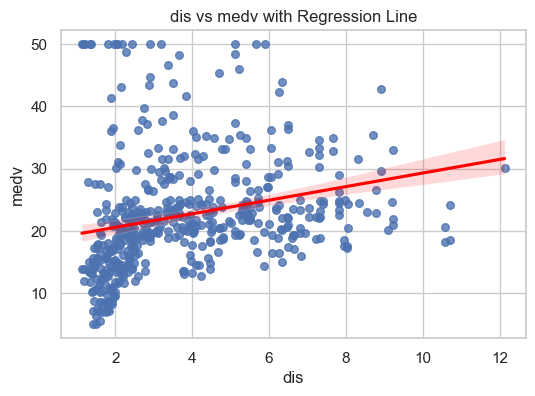

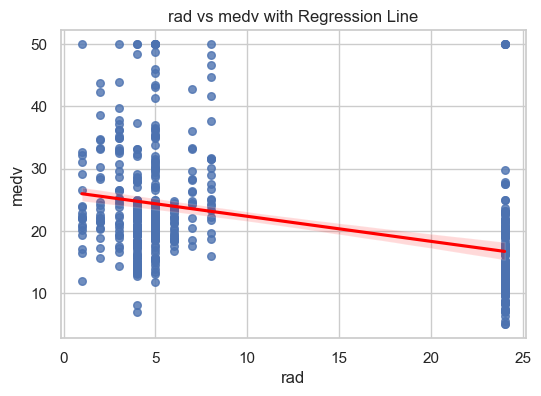

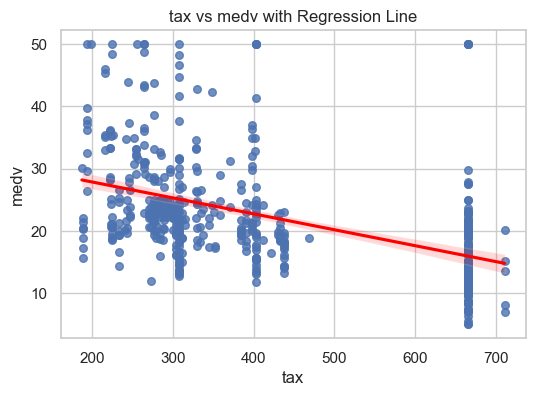

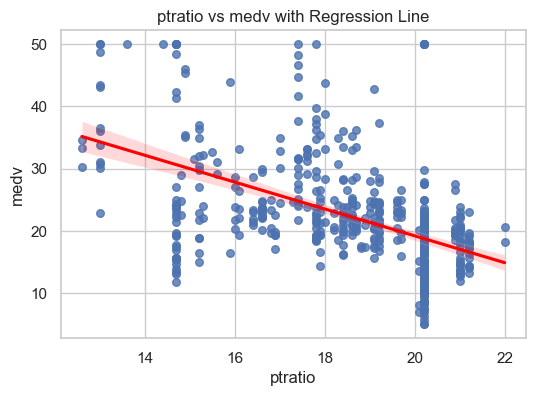

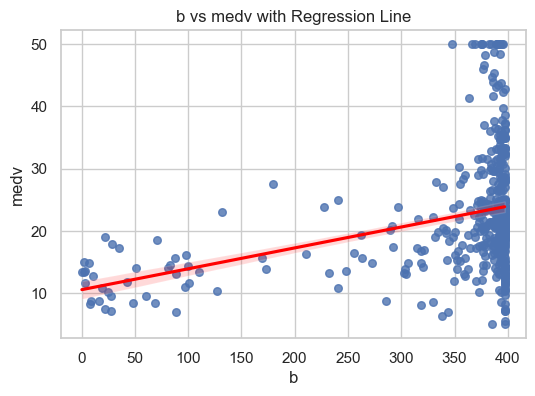

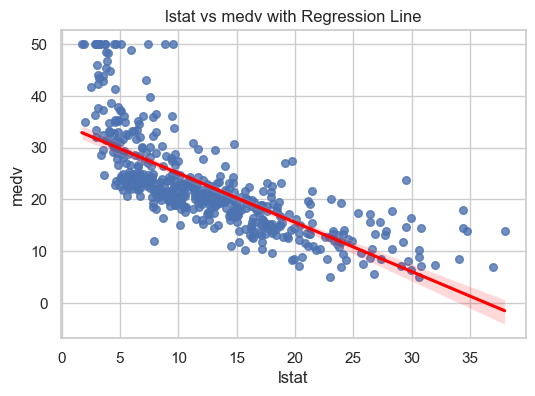

In [ ]:

key_features = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

# Scatter plots with regression line for each feature vs target (medv)
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=data[feature], y=data['medv'], scatter_kws={'s': 30}, line_kws={'color': 'red'})
    plt.title(f"{feature} vs medv with Regression Line")
    plt.xlabel(feature)
    plt.ylabel('medv')
    plt.grid(True)
    plt.show()


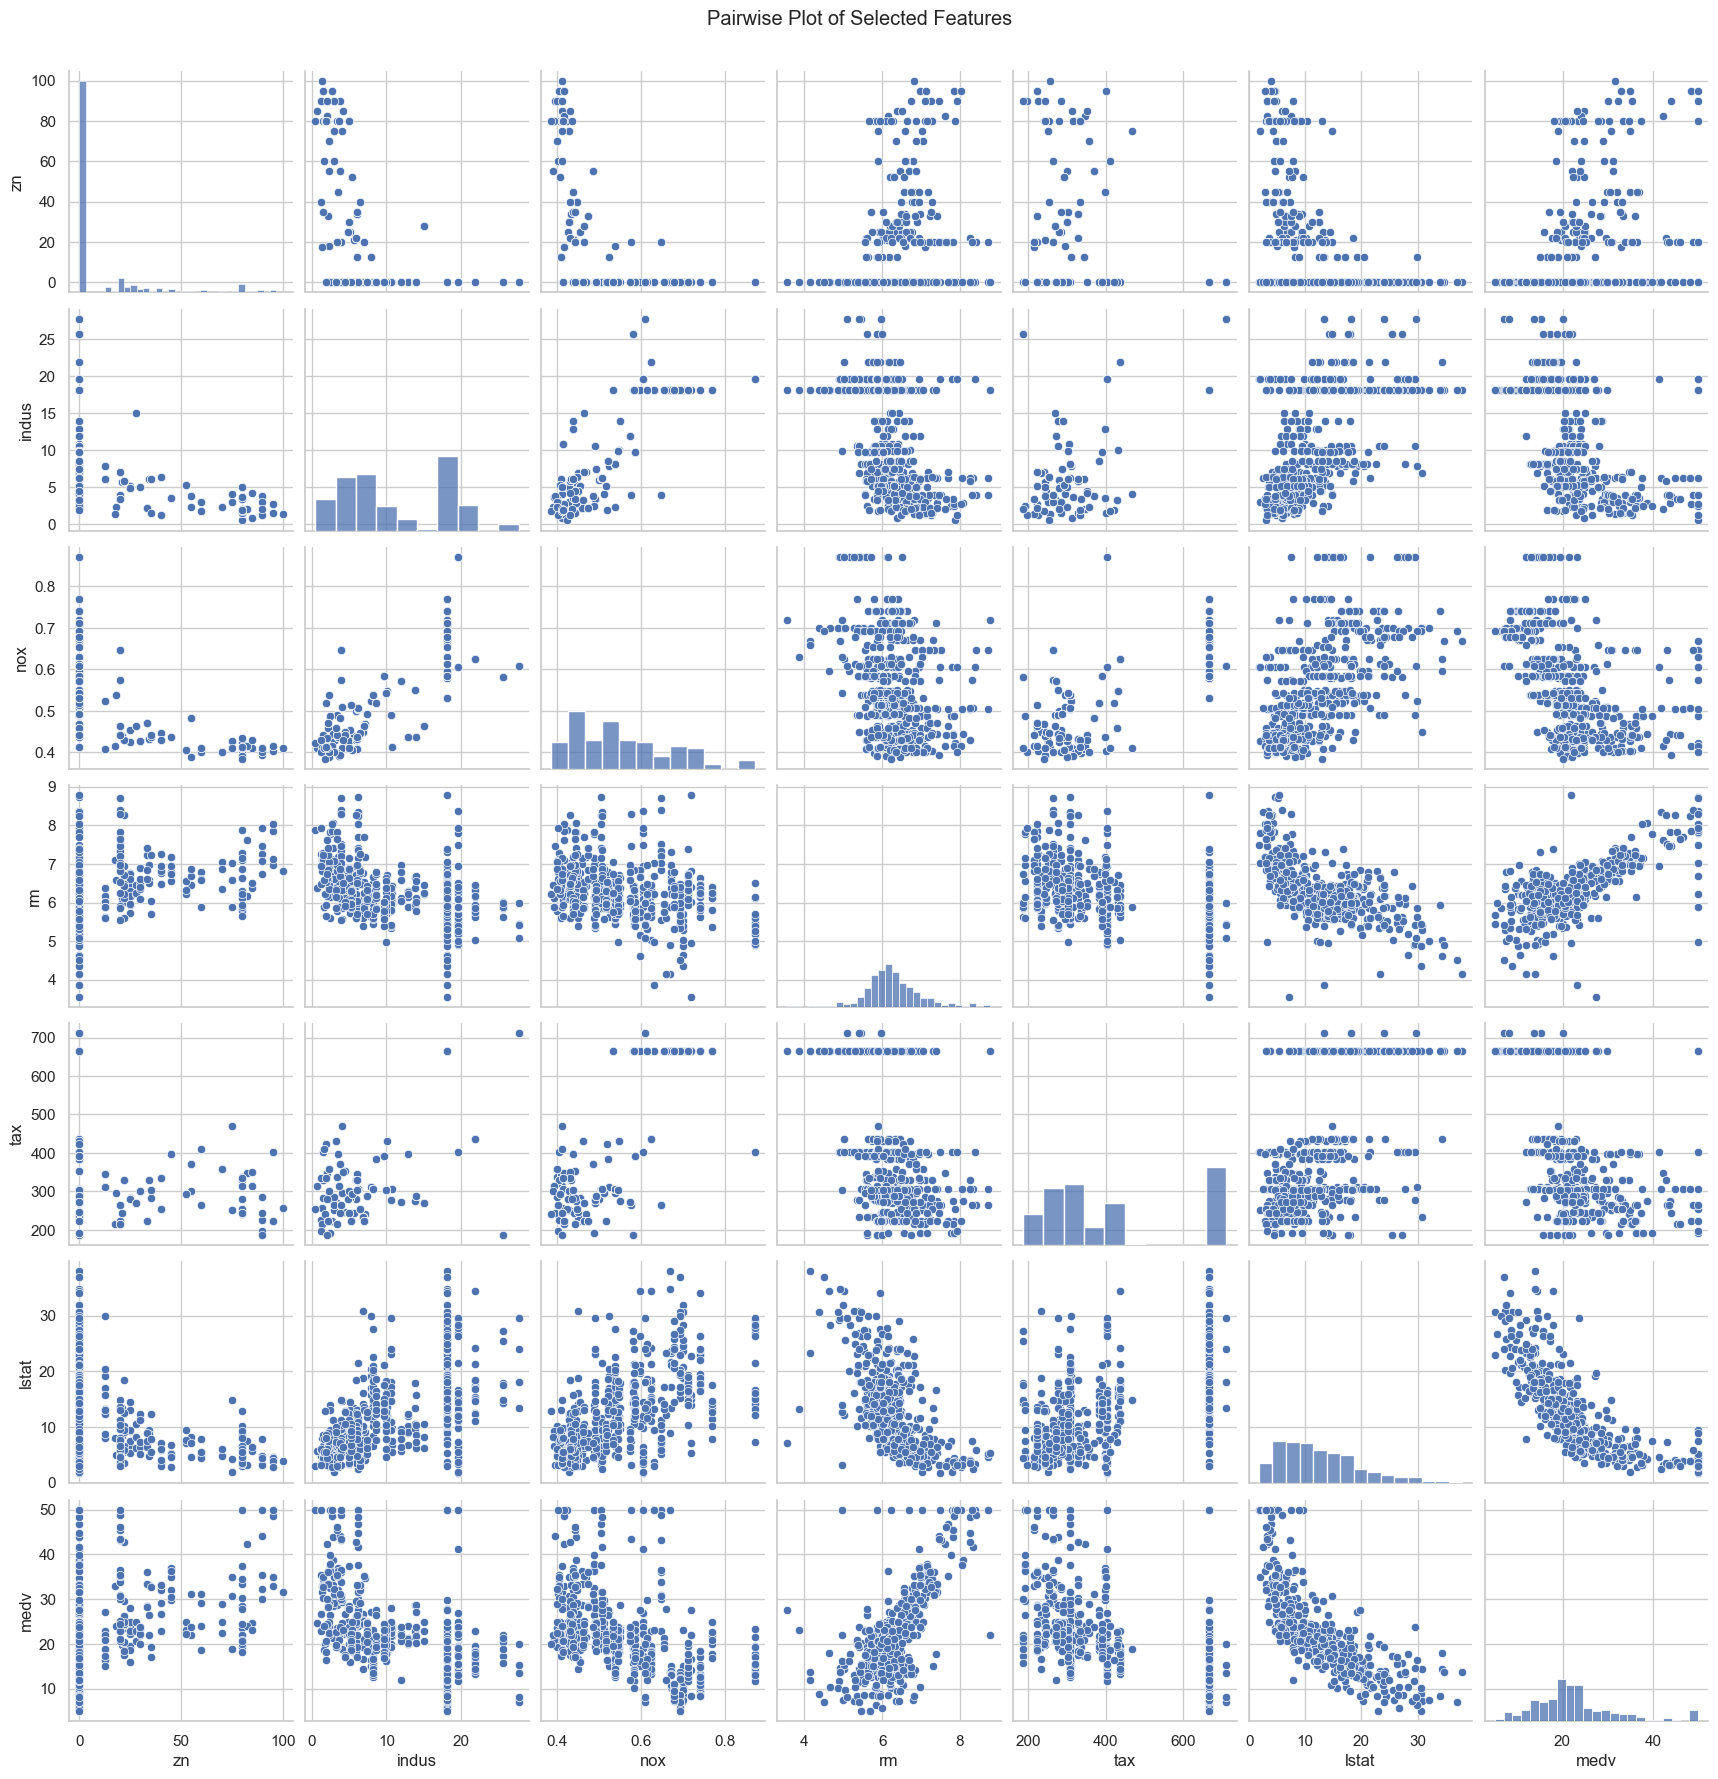

In [19]:

selected_features = ['zn', 'indus', 'nox', 'rm', 'tax', 'lstat', 'medv']
sns.pairplot(data[selected_features])
plt.suptitle('Pairwise Plot of Selected Features', y=1.02)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_38756\1579482503.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[feature], y=data['medv'], ci=None)


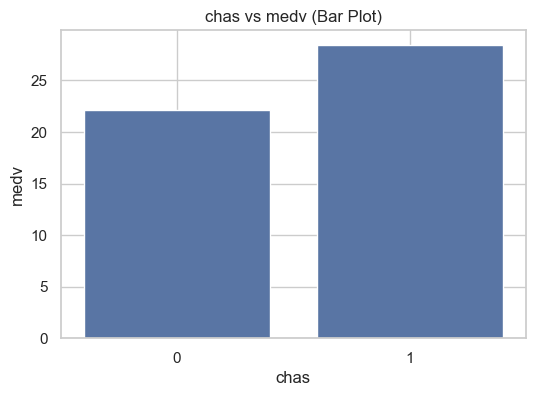

C:\Users\Dell\AppData\Local\Temp\ipykernel_38756\1579482503.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=data[feature], y=data['medv'], ci=None)


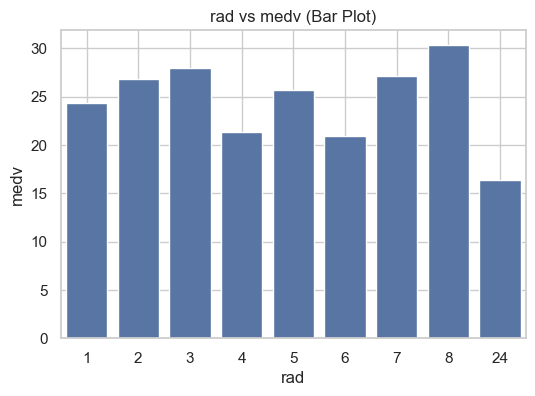

In [23]:
# List of key features to visualize
key_features = ['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']

# Bar plots for categorical variables (e.g., 'chas')
for feature in key_features:
    if data[feature].dtype == 'object' or len(data[feature].unique()) < 10:  # If the feature is categorical or has few unique values
        plt.figure(figsize=(6, 4))
        sns.barplot(x=data[feature], y=data['medv'], ci=None)
        plt.title(f'{feature} vs medv (Bar Plot)')
        plt.xlabel(feature)
        plt.ylabel('medv')
        plt.grid(True)
        plt.show()

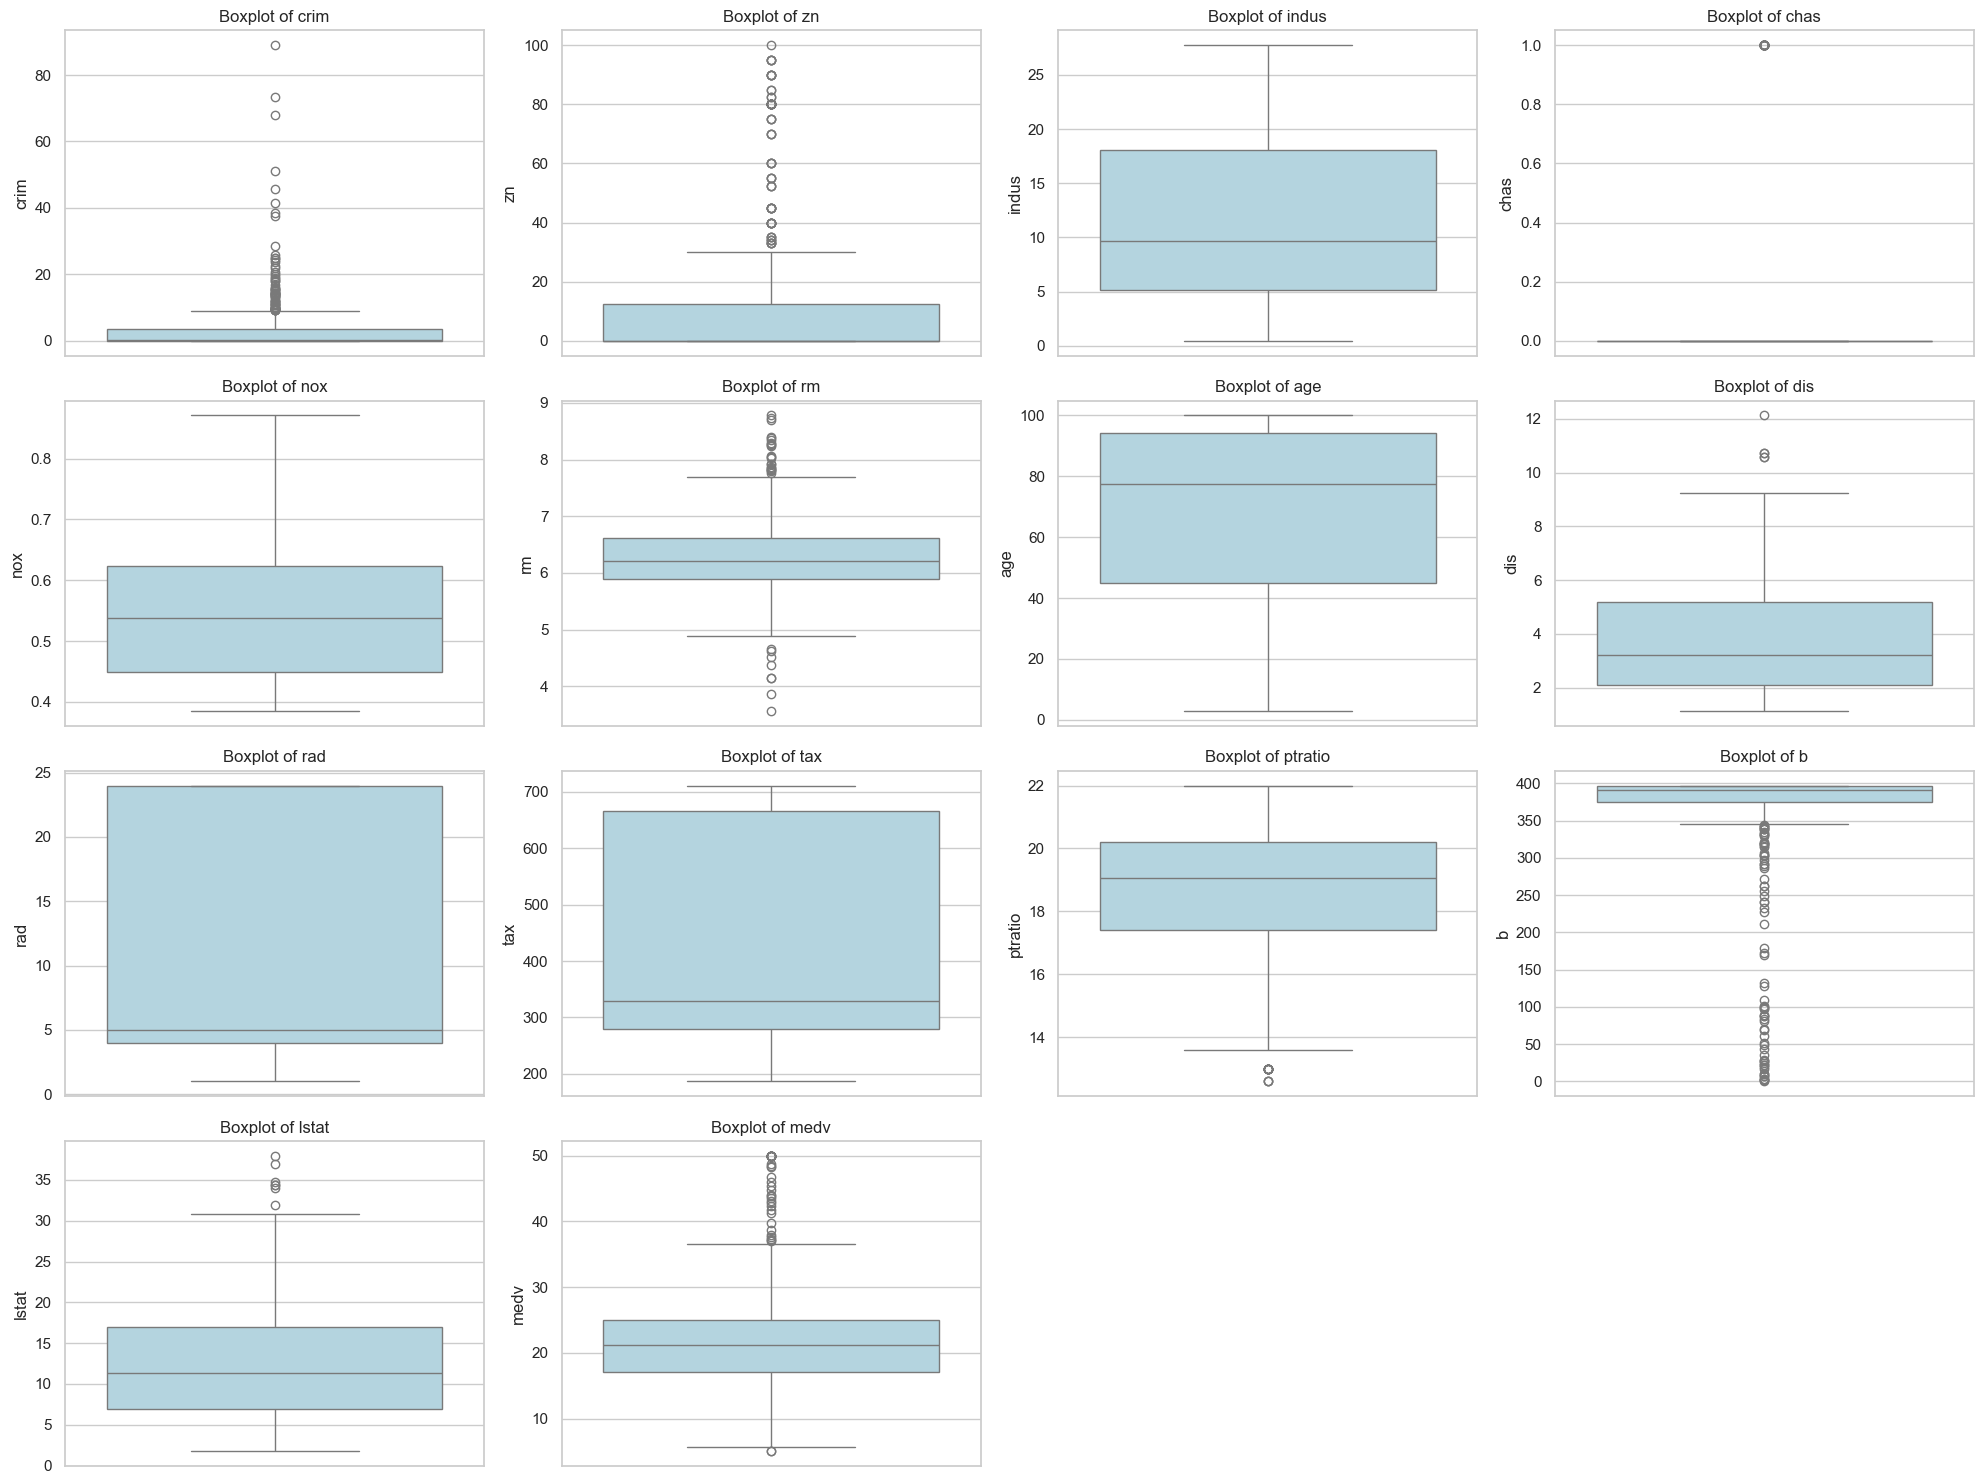

In [ ]:

# Boxplots for each numeric column
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
plt.show()


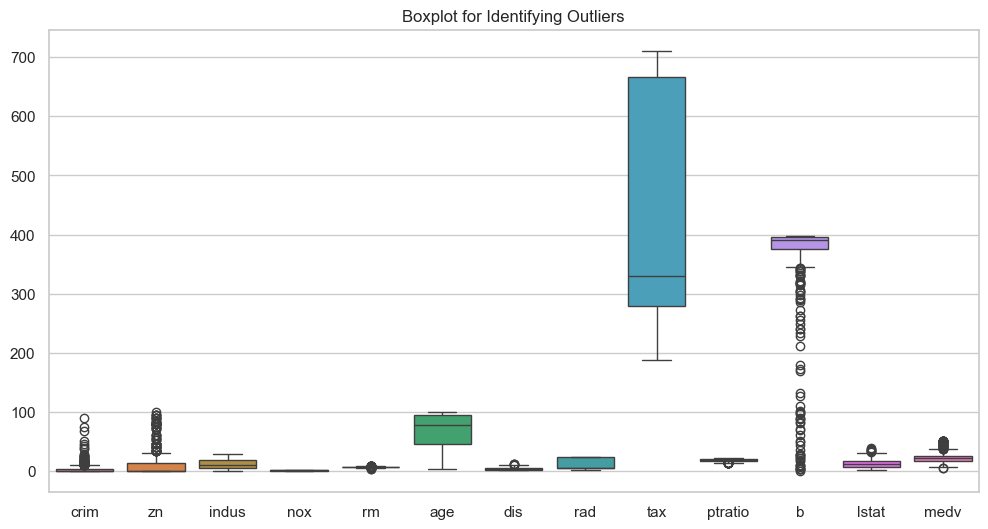

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']])
plt.title("Boxplot for Identifying Outliers")
plt.show()